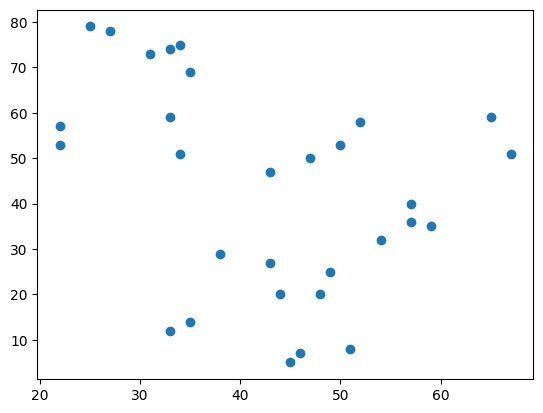

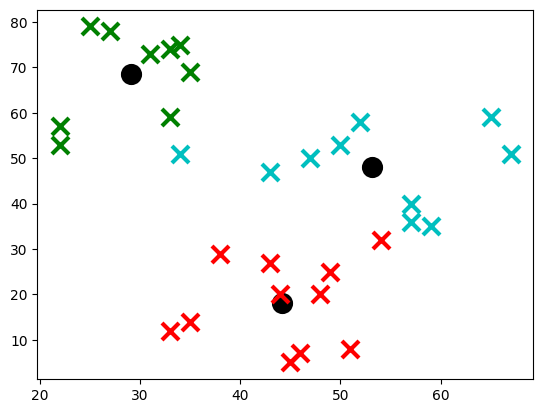

{0: array([29.11111111, 68.55555556]), 1: array([44.18181818, 18.09090909]), 2: array([53.1, 48. ])}


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# a)
data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

data = np.array([[data['x'][i], data['y'][i]] for i in range(len(data['x']))])

# b)
plt.scatter(data[:, 0], data[:, 1])

plt.show()

# c)
class K_Means:
    def __init__(self, k=2, tol=0.001, n=300):
        self.k = k
        self.tol = tol
        self.n = n

    def euclidean_distance(self, X,Y):
        return (np.sum((X-Y)**2))**0.5

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.n):
            self.classifications = {}

            for j in range(self.k):
                self.classifications[j] = []

            for value in data:
                # use euclidean_distance or np.linalg.norm
                distances = [self.euclidean_distance(value, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(value)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break
                
    def plot(self):
        colors = 10*["g","r","c","b","k"]

        #plot centroids
        for centroid in self.centroids:
            plt.scatter(self.centroids[centroid][0], self.centroids[centroid][1], marker="o", color="k", s=150, linewidths=3)

        # plot smaples
        for classification in self.classifications:
            color = colors[classification]
            for value in self.classifications[classification]:
                plt.scatter(value[0], value[1], marker="x", color=color, s=150, linewidths=3)
        
        plt.show()

clf = K_Means(k = 3)
clf.fit(data)
clf.plot()
print(clf.centroids)